In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from gtda.pipeline import Pipeline
from gtda.time_series import Resampler
from gtda.diagrams import PersistenceEntropy, Scaler, HeatKernel, BettiCurve
import numpy as np
from gtda.time_series import SingleTakensEmbedding, takens_embedding_optimal_parameters, TakensEmbedding
from sklearn.decomposition import PCA
from gtda.plotting import plot_point_cloud
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceImage

from gtda.metaestimators import CollectionTransformer

In [40]:
def read_files(path, label, limit):
    data = []
    os.chdir(path)
    i = 0
    for file in os.listdir():
        data_df = pd.read_csv(file)
        # fill NaN with an interpolated value
        data_df = data_df.interpolate()
        period = int(len(data_df)/limit)
        periodicSampler = Resampler(period=period)
        print(i,file)
        # resample the files to that all of them are the same length (in entries)
        # NOTE: timestamps are omitted and timesteps are going to be different for each resampled time series!
        index_sampled, signal_sampled = periodicSampler.fit_transform_resample(data_df.index, data_df[label])
        data.append(signal_sampled)
        i += 1
    data_T = list(map(list, zip(*data)))
    data = np.array(data_T)
    df = pd.DataFrame.from_records(data_T)
    return data.T, df

In [41]:
slugging_signals, slugging_df = read_files("/Users/simo/repos/RareEventsDataset/3w_dataset-master/data/data/3/ALL/", "P-TPT",3000)

0 SIMULATED_00035.csv
1 SIMULATED_00021.csv
2 SIMULATED_00009.csv
3 WELL-00014_20170921200114.csv
4 WELL-00014_20170925160218.csv
5 WELL-00014_20170926170228.csv
6 SIMULATED_00008.csv
7 SIMULATED_00020.csv
8 SIMULATED_00034.csv
9 SIMULATED_00022.csv
10 WELL-00014_20170920010042.csv
11 SIMULATED_00036.csv
12 WELL-00014_20170920060228.csv
13 WELL-00014_20170921050404.csv
14 SIMULATED_00037.csv
15 SIMULATED_00023.csv
16 WELL-00014_20170921100155.csv
17 SIMULATED_00027.csv
18 WELL-00001_20170320130025.csv
19 WELL-00014_20170920110053.csv
20 SIMULATED_00033.csv
21 WELL-00014_20170922060124.csv
22 SIMULATED_00032.csv
23 SIMULATED_00026.csv
24 SIMULATED_00018.csv
25 SIMULATED_00030.csv
26 SIMULATED_00024.csv
27 WELL-00014_20170926020340.csv
28 WELL-00014_20171028130000.csv
29 SIMULATED_00025.csv
30 SIMULATED_00031.csv
31 SIMULATED_00019.csv
32 SIMULATED_00056.csv
33 SIMULATED_00042.csv
34 WELL-00014_20170925210042.csv
35 WELL-00014_20171028080000.csv
36 SIMULATED_00043.csv
37 SIMULATED_00057.

In [42]:
PatoBar = 1/100000
slugging_df = slugging_df.apply(lambda x: x*PatoBar) 
slugging_signals = slugging_signals * PatoBar

In [51]:
slugging_signals.shape

(106, 3044)

In [126]:
embedding_dimension = 7
embedding_time_delay = 125
stride = 3

embedder = TakensEmbedding(time_delay=embedding_time_delay,
                           dimension=embedding_dimension,
                           stride=stride)
batch_pca =  CollectionTransformer(PCA(n_components=3),n_jobs=-1)
persistence = VietorisRipsPersistence(homology_dimensions=[0, 1], n_jobs=None) 
image = PersistenceImage(n_bins=500, sigma=0.5)

steps = [
         ("embedder", embedder),
         ("pca", batch_pca),
         ("persistence", persistence),
         ("image", image)
        ]
topological_transfomer = Pipeline(steps)

In [127]:
Per_images_slugging = topological_transfomer.fit_transform(slugging_signals)

In [128]:
image.plot(Xt=Per_images_slugging, sample=27, homology_dimension_idx=1, colorscale='viridis', plotly_params=None)

In [129]:
Per_images_slugging.shape

(106, 2, 500, 500)

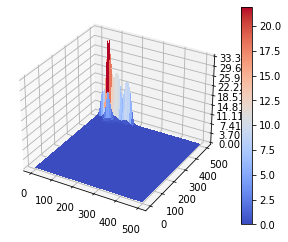

In [175]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0, 500, 1)
Y = np.arange(0, 500, 1)
X, Y = np.meshgrid(X, Y)
Z = Per_images_slugging[88,1,:,:]

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the axes.
#ax.set_zlim(0, 0.5)
#ax.set_xlim(0,10)
#ax.set_ylim(0,10)
ax.zaxis.set_major_locator(LinearLocator(10))

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf)#, shrink=0.5, aspect=5)

plt.show()

Text(0.5, 1.0, 'Simplest default with labels')

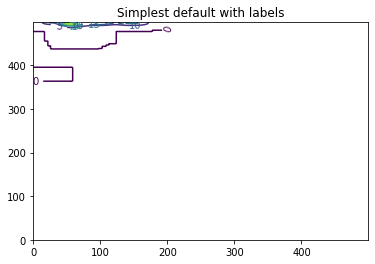

In [176]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
#ax.set_zlim(0, 0.5)
#ax.set_xlim(0,10)
#ax.set_ylim(0,10)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')

In [273]:
normal_signals, normal_df = read_files("/Users/simo/repos/RareEventsDataset/3w_dataset-master/data/data/0/", "P-TPT",3000)

0 WELL-00002_20170625220127.csv
1 WELL-00008_20170611080445.csv
2 WELL-00002_20170810020026.csv
3 WELL-00007_20170801180000.csv
4 WELL-00002_20170612110022.csv
5 WELL-00001_20170527160000.csv
6 WELL-00001_20170527060000.csv
7 WELL-00005_20170812170000.csv
8 WELL-00008_20170703060123.csv
9 WELL-00006_20170828140031.csv
10 WELL-00006_20170209000114.csv
11 WELL-00008_20170612140047.csv
12 WELL-00005_20170814200000.csv
13 WELL-00002_20170623150127.csv
14 WELL-00002_20170620140116.csv
15 WELL-00002_20170613070011.csv
16 WELL-00002_20170621180032.csv
17 WELL-00005_20170815050000.csv
18 WELL-00002_20170621030054.csv
19 WELL-00006_20170207080124.csv
20 WELL-00002_20170218210134.csv
21 WELL-00002_20170214220322.csv
22 WELL-00006_20170508090031.csv
23 WELL-00002_20170621080422.csv
24 WELL-00002_20170625170232.csv
25 WELL-00008_20170612190111.csv
26 WELL-00001_20170219070031.csv
27 WELL-00002_20170210230203.csv
28 WELL-00008_20170702050135.csv
29 WELL-00002_20170804210000.csv
30 WELL-00005_201708

248 WELL-00002_20170612210000.csv
249 WELL-00002_20170619030032.csv
250 WELL-00002_20170213060225.csv
251 WELL-00006_20170815160000.csv
252 WELL-00006_20170815060000.csv
253 WELL-00002_20170618070105.csv
254 WELL-00006_20170817080000.csv
255 WELL-00006_20170817180000.csv
256 WELL-00002_20170617220127.csv
257 WELL-00006_20170819050000.csv
258 WELL-00006_20170819150000.csv
259 WELL-00006_20170209100207.csv
260 WELL-00001_20170425040207.csv
261 WELL-00001_20170201020207.csv
262 WELL-00002_20131211230015.csv
263 WELL-00006_20170224020000.csv
264 WELL-00006_20170826220114.csv
265 WELL-00001_20170823150000.csv
266 WELL-00001_20170823050000.csv
267 WELL-00001_20170523120000.csv
268 WELL-00001_20170218060218.csv
269 WELL-00005_20170813200000.csv
270 WELL-00002_20170625070243.csv
271 WELL-00003_20170514010000.csv
272 WELL-00005_20170815170000.csv
273 WELL-00003_20170514110000.csv
274 WELL-00006_20170507030249.csv
275 WELL-00008_20170611130123.csv
276 WELL-00006_20170822080000.csv
277 WELL-00001

492 WELL-00002_20170406150000.csv
493 WELL-00001_20170201170311.csv
494 WELL-00002_20170217200225.csv
495 WELL-00003_20170820230053.csv
496 WELL-00008_20170817100246.csv
497 WELL-00002_20170808100000.csv
498 WELL-00006_20170506120042.csv
499 WELL-00002_20170808000000.csv
500 WELL-00002_20170307200031.csv
501 WELL-00001_20170523220000.csv
502 WELL-00005_20170816230000.csv
503 WELL-00002_20170219120152.csv
504 WELL-00002_20170618120600.csv
505 WELL-00008_20170611230123.csv
506 WELL-00005_20170830210000.csv
507 WELL-00002_20170809160026.csv
508 WELL-00006_20170509150042.csv
509 WELL-00006_20170222050000.csv
510 WELL-00006_20170222150000.csv
511 WELL-00002_20170621130116.csv
512 WELL-00001_20170825120000.csv
513 WELL-00001_20170825020000.csv
514 WELL-00006_20170827080114.csv
515 WELL-00006_20170821120000.csv
516 WELL-00001_20170528220000.csv
517 WELL-00006_20170821020000.csv
518 WELL-00002_20170310030146.csv
519 WELL-00008_20170819120210.csv
520 WELL-00002_20170626180138.csv
521 WELL-00002

In [274]:
embedding_dimension = 9
embedding_time_delay = 85
stride = 3

embedder = TakensEmbedding(time_delay=embedding_time_delay,
                           dimension=embedding_dimension,
                           stride=stride)
batch_pca =  CollectionTransformer(PCA(n_components=3),n_jobs=-1)
persistence = VietorisRipsPersistence(homology_dimensions=[0, 1], n_jobs=None) 
image = PersistenceImage(n_bins=500, sigma=0.5)

steps = [
         ("embedder", embedder),
         ("pca", batch_pca),
         ("persistence", persistence),
         ("image", image)
        ]
topological_transfomer = Pipeline(steps)

In [275]:
Per_images_normal = topological_transfomer.fit_transform(normal_signals)

/Users/simo/Documents/Projects/TDA/.venv/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()
/Users/simo/Documents/Projects/TDA/.venv/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()
/Users/simo/Documents/Projects/TDA/.venv/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()
/Users/simo/Documents/Projects/TDA/.venv/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()
/Users/simo/Documents/Projects/TDA/.venv/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explaine

In [276]:
Per_images_normal.shape

(597, 2, 500, 500)

In [277]:
labels_normal = np.zeros(len(Per_images_normal))
labels_slugging = np.ones(len(Per_images_slugging))
labels = np.append(labels_normal, labels_slugging)
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [278]:
Per_images_normal_H1 =  Per_images_normal[:,1,:,:]
Per_images_slugging_H1 =  Per_images_slugging[:,1,:,:]
Per_images_normal_H0 =  Per_images_normal[:,0,:,:]
Per_images_slugging_H0 =  Per_images_slugging[:,0,:,:]

imgs_array_normalH0 = np.array([img.flatten() for img in Per_images_normal_H0])
imgs_array_sluggingH0 = np.array([img.flatten() for img in Per_images_slugging_H0])
imgs_array_normalH1 = np.array([img.flatten() for img in Per_images_normal_H1])
imgs_array_sluggingH1 = np.array([img.flatten() for img in Per_images_slugging_H1])

In [279]:
imgs_array_H0 = np.vstack([imgs_array_normalH0, imgs_array_sluggingH0])
imgs_array_H1 = np.vstack([imgs_array_normalH1, imgs_array_sluggingH1])

In [280]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_trainH0, X_testH0, y_trainH0, y_testH0 = train_test_split(imgs_array_H0, labels, test_size=0.35, random_state=242)
X_trainH1, X_testH1, y_trainH1, y_testH1 = train_test_split(imgs_array_H1, labels, test_size=0.35, random_state=153)

In [281]:
lr = LogisticRegression()
lr.fit(X_trainH0, y_trainH0)
lr.score(X_testH0, y_testH0)

1.0

In [283]:
lr.fit(X_trainH1, y_trainH1)
lr.score(X_testH1, y_testH1)

0.9838056680161943

The logistic regression is very accurate: 100% accuracy for H$_0$ and 98% for H$_1$ in a binary model (normal vs. slugging). We try now adding a thirs state, the minor instability.

In [284]:
unstable_signals, unstable_df = read_files("/Users/simo/repos/RareEventsDataset/3w_dataset-master/data/data/4/", "P-TPT",3000)

0 WELL-00002_20140126140124.csv
1 WELL-00010_20180427020029.csv
2 WELL-00010_20180425080141.csv
3 WELL-00010_20180425100033.csv
4 WELL-00010_20180423220016.csv
5 WELL-00010_20180422200158.csv
6 WELL-00002_20140122020051.csv
7 WELL-00010_20180426040033.csv
8 WELL-00005_20170625133000.csv
9 WELL-00002_20140126060141.csv
10 WELL-00004_20140806100103.csv
11 WELL-00010_20180424060029.csv
12 WELL-00001_20170317000000.csv
13 WELL-00001_20170317100000.csv
14 WELL-00002_20131215160122.csv
15 WELL-00002_20140122140015.csv
16 WELL-00004_20140805020033.csv
17 WELL-00002_20131215080015.csv
18 WELL-00002_20140126160008.csv
19 WELL-00005_20170626150141.csv
20 WELL-00002_20140126000059.csv
21 WELL-00002_20140124080020.csv
22 WELL-00002_20140123020219.csv
23 WELL-00002_20140125200016.csv
24 WELL-00010_20180427200340.csv
25 WELL-00005_20170626170050.csv
26 WELL-00002_20140126040133.csv
27 WELL-00001_20170319180033.csv
28 WELL-00010_20180425000232.csv
29 WELL-00002_20140119200132.csv
30 WELL-00010_201804

253 WELL-00002_20131215120025.csv
254 WELL-00002_20140122100112.csv
255 WELL-00010_20180423200021.csv
256 WELL-00002_20140124160018.csv
257 WELL-00002_20140122040046.csv
258 WELL-00010_20180428100116.csv
259 WELL-00004_20140805040025.csv
260 WELL-00002_20140115180036.csv
261 WELL-00002_20140109050025.csv
262 WELL-00001_20170317200000.csv
263 WELL-00010_20180428020211.csv
264 WELL-00002_20140125060245.csv
265 WELL-00007_20170518130103.csv
266 WELL-00010_20180416200008.csv
267 WELL-00010_20180428060033.csv
268 WELL-00007_20170518010012.csv
269 WELL-00002_20140124140041.csv
270 WELL-00005_20170624020016.csv
271 WELL-00001_20170317040000.csv
272 WELL-00005_20170625000038.csv
273 WELL-00002_20140119160112.csv
274 WELL-00002_20140119220015.csv
275 WELL-00004_20141117230046.csv
276 WELL-00004_20141117130029.csv
277 WELL-00010_20180423040021.csv
278 WELL-00001_20170318060025.csv
279 WELL-00010_20180425040224.csv
280 WELL-00007_20170518110129.csv
281 WELL-00010_20180423000029.csv
282 WELL-00002

In [285]:
PatoBar = 1/100000
unstable_df = unstable_df.apply(lambda x: x*PatoBar) 
unstable_signals = unstable_signals * PatoBar

In [286]:
embedding_dimension = 8
embedding_time_delay = 125
stride = 3

embedder = TakensEmbedding(time_delay=embedding_time_delay,
                           dimension=embedding_dimension,
                           stride=stride)
batch_pca =  CollectionTransformer(PCA(n_components=3),n_jobs=-1)
persistence = VietorisRipsPersistence(homology_dimensions=[0, 1], n_jobs=None) 
image = PersistenceImage(n_bins=500, sigma=0.5)

steps = [
         ("embedder", embedder),
         ("pca", batch_pca),
         ("persistence", persistence),
         ("image", image)
        ]
topological_transfomer = Pipeline(steps)

In [287]:
Per_images_unstable = topological_transfomer.fit_transform(unstable_signals)

/Users/simo/Documents/Projects/TDA/.venv/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:561: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ / total_var.sum()
/Users/simo/Documents/Projects/TDA/.venv/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:561: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ / total_var.sum()
/Users/simo/Documents/Projects/TDA/.venv/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:561: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ / total_var.sum()


In [294]:
labels_unstable = np.full(len(Per_images_unstable),2)
labels = np.append(labels, labels_unstable)
labels.shape

(1391,)

In [289]:
Per_images_unstable_H0 =  Per_images_unstable[:,0,:,:]
Per_images_unstable_H1 =  Per_images_unstable[:,1,:,:]

imgs_array_unstableH0 = np.array([img.flatten() for img in Per_images_unstable_H0])
imgs_array_unstableH1 = np.array([img.flatten() for img in Per_images_unstable_H1])

In [290]:
imgs_array_H0 = np.vstack([imgs_array_H0, imgs_array_unstableH0])
imgs_array_H1 = np.vstack([imgs_array_H1, imgs_array_unstableH1])

In [291]:
X_trainH0, X_testH0, y_trainH0, y_testH0 = train_test_split(imgs_array_H0, labels, test_size=0.35, random_state=242)
X_trainH1, X_testH1, y_trainH1, y_testH1 = train_test_split(imgs_array_H1, labels, test_size=0.35, random_state=153)

In [292]:
lr = LogisticRegression()
lr.fit(X_trainH0, y_trainH0)
lr.score(X_testH0, y_testH0)

0.9945504087193461

In [293]:
lr.fit(X_trainH1, y_trainH1)
lr.score(X_testH1, y_testH1)

0.9836512261580381

### Moving to persim

In [208]:
slugging_diagrams[0]

array([[0.        , 0.13660045, 0.        ],
       [0.        , 0.14173649, 0.        ],
       [0.        , 0.15069424, 0.        ],
       ...,
       [0.0752826 , 0.0752826 , 1.        ],
       [0.0752826 , 0.0752826 , 1.        ],
       [0.0752826 , 0.0752826 , 1.        ]])

In [177]:
from ripser import Rips
from persim import PersImage
from persim import PersistenceImager

datas = slugging_point_cloud

rips = Rips(maxdim=1, coeff=2)
diagrams_slugging = [rips.fit_transform(data) for data in datas]
diagrams_slugging_h1 = [rips.fit_transform(data)[1] for data in datas]
diagrams_slugging_h0 = [rips.fit_transform(data)[0] for data in datas]

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [196]:
diagrams_slugging_h0

[array([[0.        , 0.13660045],
        [0.        , 0.14173649],
        [0.        , 0.15069424],
        ...,
        [0.        , 5.08512449],
        [0.        , 5.21912718],
        [0.        ,        inf]]),
 array([[0.        , 0.27615178],
        [0.        , 0.47297761],
        [0.        , 0.4886997 ],
        ...,
        [0.        , 7.54203606],
        [0.        , 7.86243534],
        [0.        ,        inf]]),
 array([[ 0.        ,  0.93982548],
        [ 0.        ,  1.20124066],
        [ 0.        ,  1.26200199],
        ...,
        [ 0.        , 10.54321384],
        [ 0.        , 11.41154766],
        [ 0.        ,         inf]]),
 array([[0.        , 0.27421924],
        [0.        , 0.28169188],
        [0.        , 0.28622061],
        ...,
        [0.        , 0.99644911],
        [0.        , 1.0177387 ],
        [0.        ,        inf]]),
 array([[ 0.        ,  0.285487  ],
        [ 0.        ,  0.29215842],
        [ 0.        ,  0.29230306],
    

[]

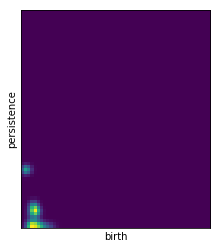

In [179]:
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(diagrams_h1)
imgs = pimgr.transform(diagrams_h1)

#len(imgs)
#imgs_array = np.array([img.flatten() for img in imgs])
#plt.figure(figsize=(20,10))

#for i in range(20):
#    ax = plt.subplot(240+i+1)
pimgr.plot_image(imgs[88])
#    plt.title("PI of $H_1$ for noise")
plt.plot()
#for i in range(10):
#   ax = plt.subplot(240+i+5)
#   pimgr.plot_image(imgs[-(i+1)], ax)
#   plt.title("PI of $H_1$ for circle w/ noise")

In [236]:
tmp = np.array(imgs)
tmp.shape

(106, 60, 69)

In [ ]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
#ax.set_zlim(0, 0.5)
#ax.set_xlim(0,10)
#ax.set_ylim(0,10)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')

In [209]:
imgs_array = np.array([img.flatten() for img in imgs])
imgs_array.shape

(106, 4140)

moving to the normal operation time series:

In [181]:
PatoBar = 1/100000
normal_df = normal_df.apply(lambda x: x*PatoBar) 
nonormal_signalsls = normal_signals * PatoBar

In [182]:
normal_point_cloud  = TE.fit_transform(normal_signals)
normal_diagrams = VRP.fit_transform(normal_point_cloud)
normal_entropy = PE.fit_transform(normal_diagrams)
normal_entropynorm = PE_norm.fit_transform(normal_diagrams)
normal_Betti = Betti.fit_transform(normal_diagrams)

In [183]:
normal_point_cloud.shape

(597, 758, 7)

In [184]:
datas = normal_point_cloud

rips = Rips(maxdim=1, coeff=2)
diagrams_normal = [rips.fit_transform(data) for data in datas]
diagrams_normal_h1 = [rips.fit_transform(data)[1] for data in datas]
diagrams_normal_h0 = [rips.fit_transform(data)[0] for data in datas]

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [217]:
len(diagrams_normal_h0[0])

758

In [213]:
pimgr.fit(diagrams_normal_h1)
#imgs_nrm = pimgr.transform(diagrams_normal_h0)


normal_diagrams.shape

#len(imgs)
#imgs_array = np.array([img.flatten() for img in imgs])
#plt.figure(figsize=(20,10))

#for i in range(20):
#    ax = plt.subplot(240+i+1)
#pimgr.plot_image(imgs_nrm[0])
#    plt.title("PI of $H_1$ for noise")
#plt.plot()
#for i in range(10):

ValueError: zero-size array to reduction operation minimum which has no identity